In [2]:
import pandas as pd
import numpy as np
df = pd.read_csv('titanic_completa_oficial.csv', na_values=['?'])
df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [3]:
df.shape

(1309, 14)

In [4]:
df['survived'].value_counts()

survived
0    809
1    500
Name: count, dtype: int64

In [5]:
df['survived'].value_counts(normalize=True)

survived
0    0.618029
1    0.381971
Name: proportion, dtype: float64

In [ ]:
df['survived'].mean()

**Bora praticar!**
  
Taxa de sobrevivência por:  
  
1) idade?  
2) faixa etária?  
3) sexo?  
4) classe?   
5) porto de embarque?  
6) preço medio por classe?  
7) fare?  


(Dos que sobreviveram:)

- qtos parentes tinham no navio?
- qtos da mesma família sobreviveram?

In [6]:
# 1) idade?  

df.groupby('age')['survived'].pipe(lambda group: round((group.sum() / len(df)) * 100, 3)).reset_index()

,age,survived
0,0.1667,0.076
1,0.3333,0.000
2,0.4167,0.076
3,0.6667,0.076
4,0.7500,0.153
...,...,...
93,70.5000,0.000
94,71.0000,0.000
95,74.0000,0.000
96,76.0000,0.076


In [7]:
faixa = ["0 até 9", "10 até 18", "19 até 30", "31 até 50" "51 até ..."]
def agragacao(x):
    if 0 <= x <=9:
        return "0 até 9"
    elif x <= 18:
        return "10 até 18"
    elif x <= 30:
        return "19 até 30"
    elif x <= 50:
        return "31 até 50"
    elif x > 50:
        "51 até ..."
df["age_range"] = df["age"].apply(agragacao)

In [8]:
# 2) faixa etária?  
df.groupby('age_range')['survived'].pipe(lambda group: round((group.sum() / len(df)) * 100, 3)).reset_index()

,age_range,survived
0,0 até 9,3.820
1,10 até 18,3.438
2,19 até 30,11.688
3,31 até 50,10.772


In [9]:
# 3) sexo?  
df.groupby('sex')['survived'].pipe(lambda group: round((group.sum() / len(df)) * 100, 3)).reset_index()

,sex,survived
0,female,25.898
1,male,12.299


In [10]:
# 4) classe?   

df.groupby('pclass')['survived'].pipe(lambda group: round((group.sum() / len(df)) * 100, 3)).reset_index()

,pclass,survived
0,1,15.279
1,2,9.091
2,3,13.827


In [11]:
# 5) porto de embarque?  

df.groupby('embarked')['survived'].pipe(lambda group: round((group.sum() / len(df)) * 100, 3)).reset_index()

,embarked,survived
0,C,11.459
1,Q,3.361
2,S,23.224


In [12]:
# 6) preço medio por classe?  


df.groupby('pclass')['fare'].mean()

pclass
1    87.508992
2    21.179196
3    13.302889
Name: fare, dtype: float64

#### (Dos que sobreviveram:)


In [14]:
# - qtos parentes tinham no navio?
df[df["survived"] == 1][["name", "sibsp"]]

,name,sibsp
0,"Allen, Miss. Elisabeth Walton",0
1,"Allison, Master. Hudson Trevor",1
5,"Anderson, Mr. Harry",0
6,"Andrews, Miss. Kornelia Theodosia",1
8,"Appleton, Mrs. Edward Dale (Charlotte Lamson)",2
...,...,...
1261,"Turkula, Mrs. (Hedwig)",0
1277,"Vartanian, Mr. David",0
1286,"Whabee, Mrs. George Joseph (Shawneene Abi-Saab)",0
1290,"Wilkes, Mrs. James (Ellen Needs)",1


**Qual a taxa de sobrevivência entre os gêneros (homens e mulheres) e classe do navio?**

In [15]:
df.groupby(['sex', 'pclass'])['survived'].pipe(lambda group: round((group.sum() / len(df)) * 100, 3)).reset_index()

,sex,pclass,survived
0,female,1,10.619
1,female,2,7.181
2,female,3,8.098
3,male,1,4.660
4,male,2,1.910
5,male,3,5.730


**O local de embarque também afeta a taxa de sobrevivência? E há relação com a classe?**

In [16]:
import seaborn as sns

In [17]:
plotagem = df.groupby(["pclass", "embarked"])['survived'].pipe(lambda group: round((group.sum() / len(df)) * 100, 3)).reset_index()
plotagem

,pclass,embarked,survived
0,1,C,7.410
1,1,Q,0.153
2,1,S,7.563
3,2,C,1.222
4,2,Q,0.153
5,2,S,7.716
6,3,C,2.827
7,3,Q,3.056
8,3,S,7.945


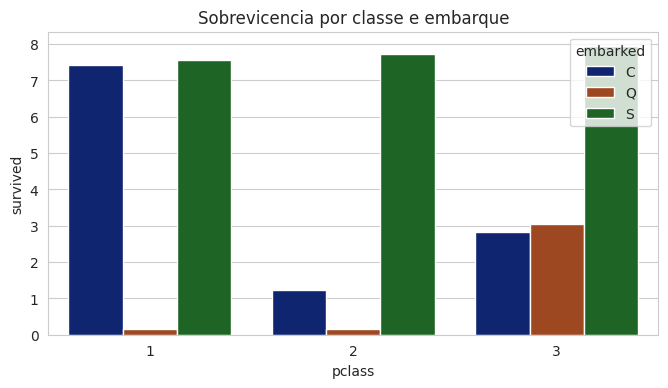

In [18]:
with sns.axes_style('whitegrid'):
    grafico = sns.barplot(data=plotagem, x='pclass', y='survived', hue='embarked',  errorbar=None, palette="dark")
    grafico.set(title="Sobrevicencia por classe e embarque")
    grafico.figure.set_size_inches(w=20/2.54, h=10/2.54)